# **Introduction: Flight Delays and Cancellations Analysis**

Air travel has become a major part of modern life, whether for business, vacations, or visiting family. However, even when passengers arrive on time and are ready to board, flights do not always operate as scheduled. Delays and cancellations can disrupt plans, cost travelers money, and cause stress. In this analysis, I will examine patterns in U.S. flight data from 2019 to 2023 to better understand how often these disruptions occur, which airlines and airports are most affected, and what the leading causes are.

By analyzing this dataset, we aim to answer the following questions:

- Which airlines have the highest rates of delays and cancellations?  
- Which months have the worst arrival delays?  
- What are the leading causes of delays (carrier, weather, late aircraft, etc.)?  


# **Dataset Overview**

This dataset, sourced from Kaggle, was published by Patrick Zel and contains information on U.S. domestic flights recorded between August 2019 and August 2023. It includes over 29 million flights with details about airlines, airports, flight times, delays, cancellations, and causes of disruption.  

**Dataset Source:** [Flight Delay and Cancellation Dataset (2019–2023) – Kaggle](https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023/data?select=flights_sample_3m.csv)  

The dataset contains 32 columns. Some of the key features I will focus on are:  

- **FL_DATE**: The date of the flight.  
- **AIRLINE_CODE**: Unique carrier code for the reporting airline.  
- **ORIGIN / DEST**: The origin and destination airport codes.  
- **DEP_DELAY**: Departure delay in minutes.  
- **ARR_DELAY**: Arrival delay in minutes.  
- **CANCELLED**: Indicator if the flight was cancelled.  
- **CANCELLATION_CODE**: Reason for cancellation (e.g., weather, carrier).  
- **DELAY_DUE_CARRIER / WEATHER / NAS / SECURITY / LATE_AIRCRAFT**: Delay minutes attributed to specific causes.  
- **DISTANCE**: Distance between origin and destination in miles.  


# **Importing the Data**

First we will import the libraries needed for data analysis. Pandas and NumPy will help us load and manipulate the dataset, while Matplotlib and Seaborn will be used later for creating visualizations. We will then use KaggleHub to download the dataset.


In [20]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Download dataset
path = kagglehub.dataset_download("patrickzel/flight-delay-and-cancellation-dataset-2019-2023")

# Load the main CSV file
df = pd.read_csv(path + "/flights_sample_3m.csv")

# Preview the first 5 rows
df.head()



Using Colab cache for faster access to the 'flight-delay-and-cancellation-dataset-2019-2023' dataset.


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [21]:
# Now I will look at the different columns, dtypes, and shape of dataframe
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [22]:
df.shape

(3000000, 32)

In [23]:
df.dtypes

,0
FL_DATE,object
AIRLINE,object
AIRLINE_DOT,object
AIRLINE_CODE,object
DOT_CODE,int64
FL_NUMBER,int64
ORIGIN,object
ORIGIN_CITY,object
DEST,object
DEST_CITY,object


# **Preprocessing the Data**

Before analyzing flight delays and cancellations, we need to make sure the dataset is in a cleaned and in a usable format. The preprocessing steps we will peform are:

- **Check for missing values**: For this dataset, many null values are expected (for example, arrival times are missing if a flight was cancelled). Instead of dropping these columns, we will keep them and work with averages or rates that ignore nulls where needed.  

- **Convert data types**: Ensure that the flight date is stored as a proper datetime, categorical fields (like airline and airport codes) are stored as categories, and cancellation/diversion flags are stored as integers (0 or 1).  

- **Explore dataset balance**: Some airlines operate far more flights than others. To avoid bias, later analysis will compare airlines using rates (average delay per flight, cancellation percentages) instead of raw totals.   


In [24]:
#check for nulls in the data set
print(df.isnull().sum())

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

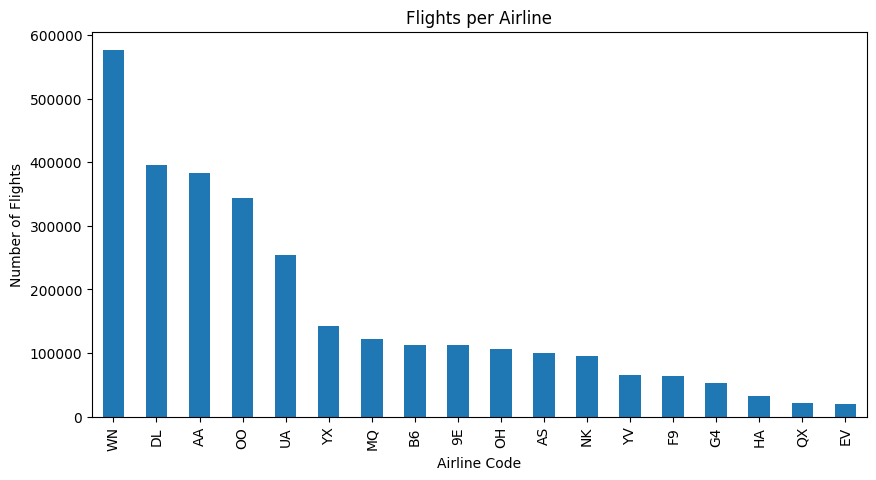

In [25]:
# Check how many flights per airline (to see if some dominate)
import matplotlib.pyplot as plt

# Flights per airline
airline_counts = df['AIRLINE_CODE'].value_counts()

plt.figure(figsize=(10,5))
airline_counts.plot(kind='bar')
plt.title('Flights per Airline')
plt.xlabel('Airline Code')
plt.ylabel('Number of Flights')
plt.show()


As we can see in the chart above, there is a clear imbalance in the number of flights per airline. This makes sense because larger and more reputable airlines operate far more flights than smaller carriers. For example, Southwest (WN), Delta (DL), and American (AA) have the highest number of flights in the dataset, while smaller regional airlines such as ExpressJet (EV) and Horizon (QX) have the fewest. This imbalance is important to note, because later analysis will focus on averages and percentages rather than raw totals in order to make fair comparisons across airlines.


In [26]:
# Change the date
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')

# Change the airline codes to categories
cat_cols = ['AIRLINE','AIRLINE_DOT','AIRLINE_CODE','ORIGIN','ORIGIN_CITY',
            'DEST','DEST_CITY','CANCELLATION_CODE']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Convert flags to int
for col in ['CANCELLED','DIVERTED']:
    if col in df.columns:
        df[col] = df[col].fillna(0).astype(int)

In [27]:
# Quick overview of data types and non-null counts after preprocessing
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   FL_DATE                  datetime64[ns]
 1   AIRLINE                  category      
 2   AIRLINE_DOT              category      
 3   AIRLINE_CODE             category      
 4   DOT_CODE                 int64         
 5   FL_NUMBER                int64         
 6   ORIGIN                   category      
 7   ORIGIN_CITY              category      
 8   DEST                     category      
 9   DEST_CITY                category      
 10  CRS_DEP_TIME             int64         
 11  DEP_TIME                 float64       
 12  DEP_DELAY                float64       
 13  TAXI_OUT                 float64       
 14  WHEELS_OFF               float64       
 15  WHEELS_ON                float64       
 16  TAXI_IN                  float64       
 17  CRS_ARR_TIME             in

# **Data Understanding & Visualization**

To uncover trends in flight delays and cancellations, we will create data visualizations that directly address our guiding questions.

**Key Questions We Hope to Answer:**

- Which airlines have the highest rates of delays and cancellations?  
- Which months have the worst arrival delays?
- What are the leading causes of delays (carrier, weather, late aircraft, etc.)?  


/tmp/ipython-input-35555223.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  air_delay = df.groupby('AIRLINE_CODE')['ARR_DELAY'].mean().sort_values()


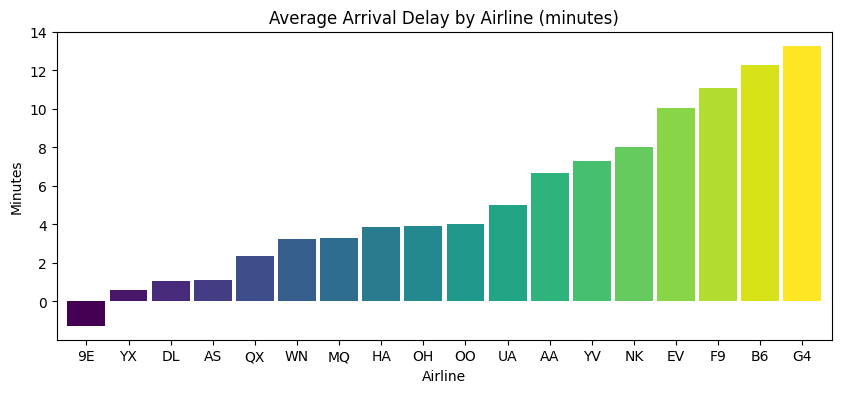

/tmp/ipython-input-35555223.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rate = df.groupby('AIRLINE_CODE')['CANCELLED'].mean().sort_values() * 100


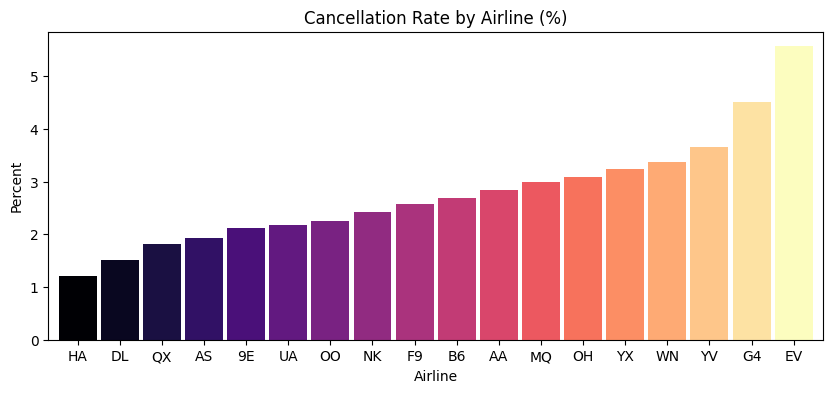

In [28]:
# Average arrival delay (minutes) by airline
air_delay = df.groupby('AIRLINE_CODE')['ARR_DELAY'].mean().sort_values()

# Average Arrival Delay by Airline (minutes) Bar Chart
plt.figure(figsize=(10,4))
colors = plt.cm.viridis(np.linspace(0,1,len(air_delay)))
air_delay.plot(kind='bar', width = 0.9, color=colors)
plt.title('Average Arrival Delay by Airline (minutes)')
plt.xlabel('Airline')
plt.ylabel('Minutes')
plt.xticks(rotation=0)
plt.show()

# Cancellation rate (%) by airline, have to multiply by 100 to get percentage
cancel_rate = df.groupby('AIRLINE_CODE')['CANCELLED'].mean().sort_values() * 100

# Cancellation Rate by Airline (%) Bar Chart
plt.figure(figsize=(10,4))
colors = plt.cm.magma(np.linspace(0,1,len(cancel_rate)))
cancel_rate.plot(kind='bar', width = 0.9,color=colors)
plt.title('Cancellation Rate by Airline (%)')
plt.xlabel('Airline')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.show()

The first plot helps us answer which airlines have the highest rates of delays. This bar chart shows the **average arrival delay by airline**, which was calculated by taking the mean of the 'ARR_DELAY' column for each airline. The results show that some airlines, such as G4, B6, and F9, have the highest average delays, while others like 9E, YX, and DL arrive on time on average. This can be useful for families planning an important trip who want to consider different options for airlines.

The second plot focuses on **cancellation rates by airline**. To create this chart, we used the 'CANCELLED' column, which indicates whether a flight was canceled, and calculated the average percentage of cancellations per airline. The results show that airlines such as EV and G4 have the highest cancellation rates, while carriers like HA and DL maintain some of the lowest. This shows that DL is one of the best options because not only does it have the lowest cancellation rates and minimal delays in minutes, but if you scroll up to preprocessing steps, it also ranked second for airlines with the most flights.


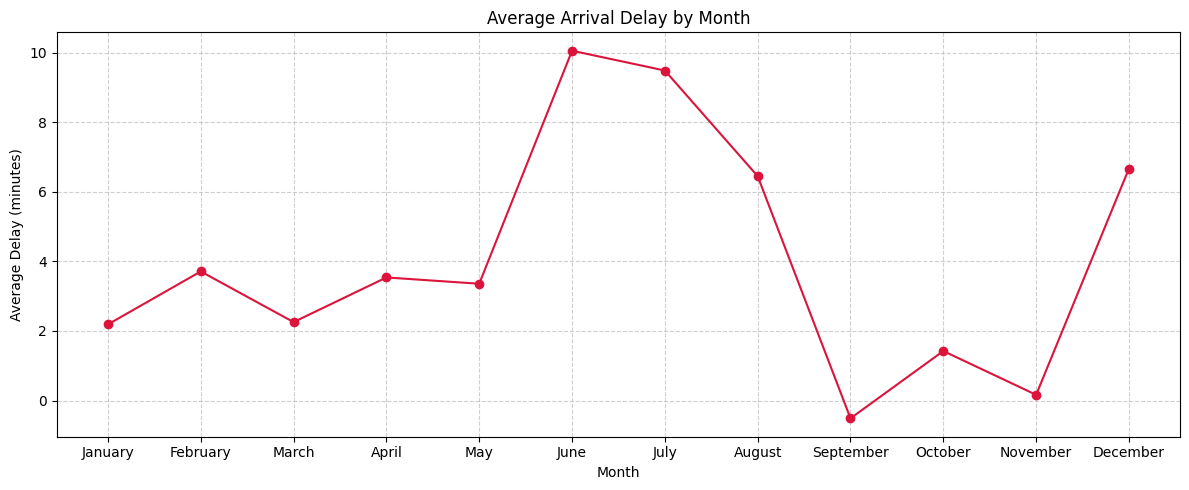

In [29]:
# Average arrival delay by month
monthly_delay = df.groupby(df['FL_DATE'].dt.strftime('%B'))['ARR_DELAY'].mean()

# Order months manually instead of the defualt (alphabetically)
month_order = ["January","February","March","April","May","June","July",
               "August","September","October","November","December"]
monthly_delay = monthly_delay.reindex(month_order)

# Average Delay (minutes) Line plot
plt.figure(figsize=(12,5))
plt.plot(monthly_delay.index, monthly_delay.values, marker='o', linestyle='-', color='crimson')
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


This line chart helps us answer which **months experience the most delays**. We used the 'FL_DATE' column to extract the month and then calculated the average of the 'ARR_DELAY' values. The chart shows that delays are most common during peak travel months such as June, July, August, and December. I expected peak months like June and July to have flights with an avergae of 10 or 9.5 minute delays. However, I did not excepct November to have relatively low average delays of around 1 minute becuase many people travel during that month to visit family for the holidays.

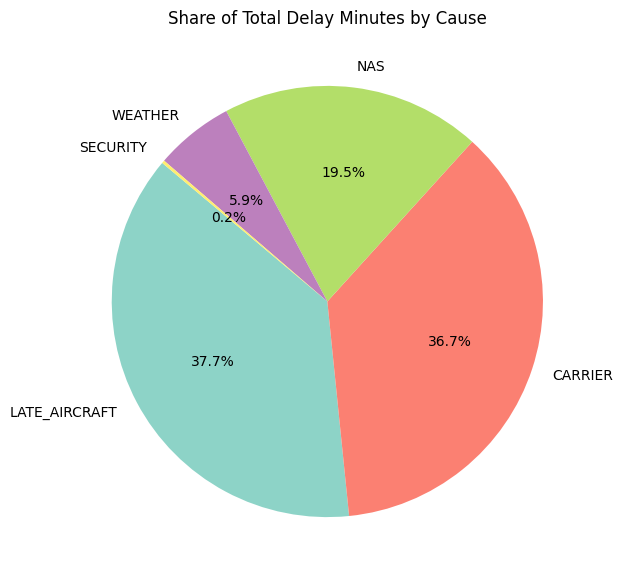

In [30]:
delay_cols = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]
present = [c for c in delay_cols if c in df.columns]

# Total minutes by cause
cause_totals = df[present].sum().sort_values(ascending=False)

# Pie Chart of Total Delay Minutes by Cause
plt.figure(figsize=(7,7))
plt.pie(
    cause_totals,
    labels=cause_totals.index.str.replace('DELAY_DUE_', ''),
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3(np.linspace(0,1,len(cause_totals)))
)
plt.title('Share of Total Delay Minutes by Cause')
plt.show()




The final visualization answers the question of **what the leading causes of delays are**. To create this chart, we summed the total number of delay minutes across all flights for each cause (carrier, weather, NAS, security, and late aircraft). The results are shown as a pie chart, which makes it easy to compare proportions. From the chart, we can see that late aircraft had 37.7% and carrier-related issues had 36.7%, mmaking them the two biggest contributors to delays, and taking up nearly 3/4ths of all delay minutes. NAS delays (air traffic system issues) contribute about 19.5%, while weather had 5.9% and security played the smallest roll with 0.2%. I am suprised by these results becasue many times weather often gets blamed for delays but the majority of problems actually come from airlines themselves or the ripple effect of one delayed aircraft affecting later flights.
